Theoretical period (T): 19.625373721309096
Estimated period from the data: 19.625366160019627


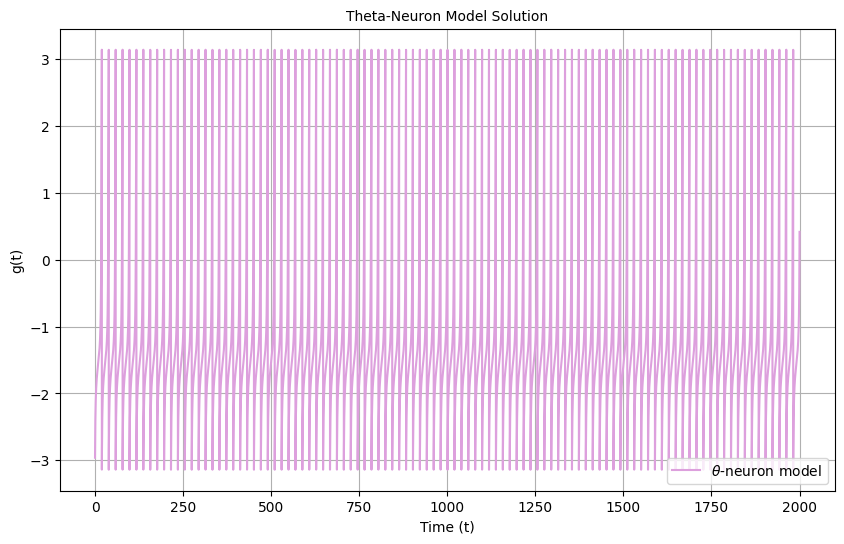

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import plotly.graph_objects as go
from scipy.integrate import solve_ivp
from plotly.subplots import make_subplots
from scipy.optimize import fsolve
from matplotlib import pyplot

def sol(mu, t, c, epsilon, omega, eta, alpha):
    """
    This is a function corresponding to the theta-neuron model.
    Vars:
        mu: float
        t: integer
        c: float
        epsilon: float
        omega: float
        eta: float
        alpha: float
    """
    g=2*np.arctan((-1+((mu+omega)**2-1)**(1/2)* np.tan(0.5*((mu+omega)**2-1)**(1/2)*(t+c)))/(mu+omega))
    return g

#Parameters
epsilon=0.01
omega=0.7
eta=0.9
alpha=np.pi
c=10
t=np.linspace(0, 2000, 1000000) #Here the bigger the time space the more accurate it is the estimated period from the data compared to the theoretical one. This is due to the fact that by increasing the latter number we divide the t axis in more evenly spaced values
mu=0.35

#Here we have the solution to the theta-neuron once the parameters are substituted
g=sol(mu, t, c, epsilon, omega, eta, alpha)

T_theoretical=2*np.pi/((omega+mu)**2-1)**(1/2)
print(f"Theoretical period (T): {T_theoretical}")

#We use the points where g changes sign in order to calculate the estimated period
zero_crossings=np.where(np.diff(np.sign(g)))[0]
if len(zero_crossings) > 1:
    crossing_times=t[zero_crossings]
    time_differences=np.diff(crossing_times)
    estimated_period=np.mean(time_differences)*2
    print(f"Estimated period from the data: {estimated_period}")
else:
    print("Not enough zero-crossings to estimate the period.", fontsize=10)


#Plotting of the theta-neuron solution
plt.figure(figsize=(10, 6))
plt.plot(t, g, label=r'$\theta$-neuron model', color='plum')
plt.title("Theta-Neuron Model Solution", fontsize=10)
plt.xlabel("Time (t)", fontsize=10)
plt.ylabel("g(t)", fontsize=10)
plt.legend(loc="lower right", fontsize=10)
plt.grid()
plt.show()
